In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [23]:
data = pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/preprocessed123.csv")
data1 = pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/uci-secom.csv")
X = pd.DataFrame(data=data)
y = data1['Pass/Fail']

In [24]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with f-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with f-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


C:\Users\Manidhar\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  5                              with f-value 0.0
Add  49                             with f-value 0.0
Add  69                             with f-value 0.0
Add  42                             with f-value 0.0
Add  59                             with f-value 5.67481e-10
Add  64                             with f-value 6.41284e-08
Add  348                            with f-value 5.4592e-05
Add  21                             with f-value 6.09008e-05
Add  124                            with f-value 0.00038819
Add  332                            with f-value 0.00141743
Add  196                            with f-value 3.18317e-05
Add  75                             with f-value 0.00015728
Add  204                            with f-value 0.00204489
Add  99                             with f-value 0.00180504
Add  437                            with f-value 0.00286186
Add  214                            with f-value 0.00773344
resulting features:
['5', '49', '69', '42', '59', '64', '348', '

In [25]:
data1 = pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,result]

In [26]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data1,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1253, 16), (314, 16), (1253,), (314,))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)

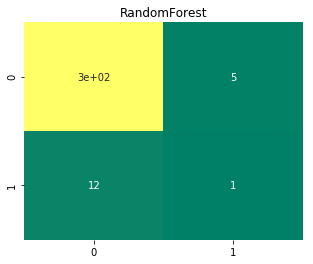

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()

In [29]:
cr_rt=classification_report(y_test,y_predict_knn)
print(cr_rt)

             precision    recall  f1-score   support

         -1       0.96      0.98      0.97       301
          1       0.17      0.08      0.11        13

avg / total       0.93      0.95      0.94       314

